### 자치구 사고구조분석표 탐색

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/교통사고_통합_2017-2019.csv', encoding='cp949')

In [18]:
df.head()

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구,Unnamed: 28
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,주간,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,주간,차대차,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,심야,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,심야,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,출퇴근,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구,NaN


In [19]:
# 주요 feature 확인
print('년도 : ', df['년도'].unique())
print('자치구 : ', df['자치구'].unique())
print('일광상태 : ', df['일광상태'].unique())
print('종별 : ', df['종별'].unique())


년도 :  [2017 2018 2019]
자치구 :  ['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
일광상태 :  ['주간' '심야' '출퇴근' '새벽']
종별 :  ['승용' '화물' '승합' '자전거' '이륜' '기타' '건설기계' '특수' '원동기']


In [20]:
df1 = df.copy()
df1.drop(columns='Unnamed: 28', axis=1, inplace=True)

In [21]:
# 열 이름 변경
print(df1.columns)
df1.rename(columns={'연령':'1당운전자_연령', '성별':'1당운전자_성별', '경력':'1당운전자_경력', '음주':'1당운전자_음주','종별':'1당차량_종별', '용도':'1당차량_용도'}, inplace=True)

Index(['년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수', '부상자수',
       '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태', '기상상태', '일광상태',
       '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도', '자치구'],
      dtype='object')


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20061 entries, 0 to 20060
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   년도        20061 non-null  int64  
 1   월         20061 non-null  int64  
 2   일         20061 non-null  int64  
 3   요일        20061 non-null  object 
 4   시각        20061 non-null  int64  
 5   사고등급      20061 non-null  object 
 6   사망자수      20061 non-null  int64  
 7   중상자수      20061 non-null  int64  
 8   경상자수      20061 non-null  int64  
 9   부상자수      20061 non-null  int64  
 10  1당운전자_연령  20061 non-null  object 
 11  1당운전자_성별  20061 non-null  object 
 12  1당운전자_경력  20061 non-null  object 
 13  1당운전자_음주  1376 non-null   float64
 14  1당차량_종별   20061 non-null  object 
 15  1당차량_용도   20061 non-null  object 
 16  관련자2      20061 non-null  object 
 17  사고형태      20061 non-null  object 
 18  기상상태      20061 non-null  object 
 19  일광상태      20061 non-null  object 
 20  사고유형1     20061 non-null  ob

In [23]:
df1.describe()

,년도,월,일,시각,사망자수,중상자수,경상자수,부상자수,1당운전자_음주,위도,경도
count,20061.000000,20061.000000,20061.000000,20061.000000,20061.000000,20061.000000,20061.000000,20061.000000,1376.0,20061.000000,20061.000000
mean,2017.982404,6.568715,15.764867,12.597179,0.005932,0.297792,1.059768,0.121031,0.0,37.518631,121.583563
std,0.815930,3.434681,8.763100,6.957060,0.078080,0.557689,1.106163,0.395396,0.0,0.563278,33.937156
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,32.936471,-122.478255
25%,2017.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,37.503127,126.915853
50%,2018.000000,7.000000,16.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.0,37.541619,127.004791
75%,2019.000000,10.000000,23.000000,19.000000,0.000000,1.000000,1.000000,0.000000,0.0,37.585887,127.048964
max,2019.000000,12.000000,31.000000,23.000000,2.000000,14.000000,41.000000,10.000000,0.0,42.089233,128.906520


In [24]:
# 연령 내 '불명' 값 평균 값으로 처리
df1['1당운전자_연령'] = pd.to_numeric(df1['1당운전자_연령'],errors='coerce')
df1['1당운전자_연령'].fillna(df1['1당운전자_연령'].mean(), inplace=True)
df1['1당운전자_연령'].isnull().sum()

0

In [25]:
df1['1당운전자_음주'].value_counts()

0.0    1376
Name: 1당운전자_음주, dtype: int64

In [26]:
# 음주여부를 1로 표시
df1['1당운전자_음주'] = df1['1당운전자_음주'].replace([0.0], 1) # 음주 : 0으로 표시된 부분을 1, 
df1['1당운전자_음주'].fillna(0, inplace=True) # 나머지 null 값을 0으로 변경

In [27]:
df1['년도'] = df1['년도'].astype(str)
df1['1당운전자_연령'] = df1['1당운전자_연령'].astype(int)
df1['1당운전자_음주'] = df1['1당운전자_음주'].astype(int)

In [28]:
df1['1당운전자_음주'].value_counts()

0    18685
1     1376
Name: 1당운전자_음주, dtype: int64

In [29]:
df1.isna().sum().sum()

0

### 자치구 집계 테이블

In [30]:
district_df = pd.DataFrame({'사고수':df1.groupby(['년도','자치구']).size(),
                            '사망자수':df1.groupby(['년도','자치구'])['사망자수'].sum(),
                            '중상자수':df1.groupby(['년도','자치구'])['중상자수'].sum(),
                            '경상자수':df1.groupby(['년도','자치구'])['경상자수'].sum(),
                            '부상자수':df1.groupby(['년도','자치구'])['부상자수'].sum(),
                            '사고운전자_평균연령':round(df1.groupby(['년도','자치구'])['1당운전자_연령'].mean(),1),
                            '음주운전사고수':df1.groupby(['년도','자치구'])['1당운전자_음주'].sum(),
                            '출퇴근시간_사고수':df1[df1['일광상태']=='출퇴근'].groupby(['년도','자치구'])['일광상태'].count(),
                            '이륜차_사고수':df1[df1['1당차량_종별']=='이륜'].groupby(['년도','자치구'])['1당차량_종별'].count(),
                            '고령운전자_사고수':df1[df1['1당운전자_연령']>=65].groupby(['년도','자치구'])['1당운전자_연령'].count()}).reset_index()

In [31]:
district_df

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수
0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48
1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28
2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33
3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30
4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2019,용산구,235,0,56,255,12,49.8,14,47,10,41
71,2019,은평구,199,1,73,191,26,52.5,16,49,5,38
72,2019,종로구,275,2,91,278,51,50.3,16,66,12,53
73,2019,중구,270,1,79,267,27,51.1,7,57,7,54


### 자치구 분석 테이블(통계 데이터 결합)

### (1) 자치구별 등록인구 

In [32]:
pop = pd.read_excel('../data/자치구_통계/시군구별_등록인구_2017-2019.xls')

In [33]:
pop

,시군구별 등록인구,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,(단위 : 명),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,시도,시군구,성별,2017,2017,2017,2018,2018,2018,2019,2019,2019
2,시도,시군구,성별,계,한국인,외국인,계,한국인,외국인,계,한국인,외국인
3,전국,전국,전국,52950306,51778544,1171762,53072685,51826059,1246626,53121668,51849861,1271807
4,서울,계,계,10124579,9857426,267153,10049607,9765623,283984,10010983,9729107,281876
...,...,...,...,...,...,...,...,...,...,...,...,...
704,세종,계,계,284225,280100,4125,319066,314126,4940,346275,340575,5700
705,세종,세종시,계,284225,280100,4125,319066,314126,4940,346275,340575,5700
706,세종,세종시,남,142213,139734,2479,159840,156831,3009,173432,169845,3587
707,세종,세종시,여,142012,140366,1646,159226,157295,1931,172843,170730,2113


In [34]:
# 첫 행 삭제(제목)
pop1 = pop.copy()
pop1.columns = pop1.iloc[1]
pop1.columns.name=None
pop1.drop([0,1], axis=0, inplace=True)

In [35]:
pop1.head()

,시도,시군구,성별,2017,2017,2017,2018,2018,2018,2019,2019,2019
2,시도,시군구,성별,계,한국인,외국인,계,한국인,외국인,계,한국인,외국인
3,전국,전국,전국,52950306,51778544,1171762,53072685,51826059,1246626,53121668,51849861,1271807
4,서울,계,계,10124579,9857426,267153,10049607,9765623,283984,10010983,9729107,281876
5,서울,종로구,계,164257,154770,9487,163026,153065,9961,161869,151290,10579
6,서울,종로구,남,80094,75967,4127,79156,74825,4331,78215,73746,4469


In [36]:
pop1 = pop1[pop1['시도'] =='서울']
pop1 = pop1[pop1['성별'] =='계']
pop1.drop(4, axis=0, inplace=True)
pop1.drop(columns=['시도','성별'],axis=1, inplace=True)
pop1.set_axis(['자치구','2017','2017_한국인','2017_외국인','2018','2018_한국인','2018_외국인','2019','2019_한국인','2019_외국인'], axis='columns', inplace=True)
pop1.drop(columns=['2017_한국인','2017_외국인','2018_한국인','2018_외국인','2019_한국인','2019_외국인'],axis=1, inplace=True)

In [37]:
# 재구조화(unpivot)
pop1 = pd.melt(pop1, id_vars=['자치구'],value_vars=['2017','2018','2019'])
pop1.rename(columns={'variable':'년도', 'value':'등록인구'}, inplace=True)
#pop1 = pop1[['년도','자치구','등록인구']]

In [38]:
pop1 = pop1[['년도','자치구','등록인구']]
# pop1['년도'] = pop1['년도'].astype(int)
pop1

,년도,자치구,등록인구
0,2017,종로구,164257
1,2017,중구,134593
2,2017,용산구,244444
3,2017,성동구,312711
4,2017,동대문구,366011
...,...,...,...
70,2019,중랑구,402024
71,2019,노원구,537303
72,2019,광진구,366972
73,2019,강북구,317695


### (2) 자동차등록대수
- 최종 사용 df : car_total, twowheel

In [39]:
car = pd.read_excel('../data/자치구_통계/시군구별_자동차등록대수_2017-2019.xls')

In [40]:
car_type = ['승용','승합','화물','특수','이륜','건설기계','농기계']
car.head()

,시군구별 자동차등록대수,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,(단위 : 대),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,시도,시군구,차량용도,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019
2,시도,시군구,차량용도,승용,승합,화물,특수,이륜,건설기계,농기계,...,이륜,건설기계,농기계,승용,승합,화물,특수,이륜,건설기계,농기계
3,전국,전국,계,18034540,867522,3540323,85910,2196475,468614,-,...,2208424,482642,1096835,19177517,811799,3592586,95464,2236895,489307,1100894
4,전국,전국,관용,30705,21556,30813,2687,26846,-,-,...,26914,-,-,33344,23014,33072,2867,27083,-,-


In [41]:
car1 = car.copy()
car1= car1.replace('-',0)
# 연도+차량용도 --> column
car1.columns = car1.iloc[1:3].apply(lambda x: '_'.join([y for y in x if y]), axis=0)
car1.drop([0,1,2], axis=0, inplace=True)
car1 = car1[car1['시도_시도']=='서울']
car1 = car1[car1['차량용도_차량용도']=='계']

In [42]:
car1.head()

,시도_시도,시군구_시군구,차량용도_차량용도,2017_승용,2017_승합,2017_화물,2017_특수,2017_이륜,2017_건설기계,2017_농기계,...,2018_이륜,2018_건설기계,2018_농기계,2019_승용,2019_승합,2019_화물,2019_특수,2019_이륜,2019_건설기계,2019_농기계
7,서울,종로구,계,41115,4055,5469,189,13388,0,0,...,13151,0,0,40900,3772,5200,180,13269,0,0
11,서울,중구,계,40523,3508,7294,215,14809,0,0,...,14603,0,0,41182,3202,7128,224,14353,0,0
15,서울,용산구,계,67335,2783,7221,119,16124,0,0,...,16016,0,0,67160,2431,6817,113,16145,0,0
19,서울,성동구,계,87762,3698,11459,197,20695,0,0,...,20618,0,0,89939,5316,10827,181,20165,0,0
23,서울,동대문구,계,79837,4249,13244,177,24145,0,0,...,23766,0,0,81208,3647,12875,180,23727,0,0


In [43]:
car1['2017_차량대수'] = car1['2017_건설기계'] + car1['2017_농기계'] + car1['2017_승용'] + car1['2017_승합'] + car1['2017_이륜'] + car1['2017_특수'] + car1['2017_화물']
car1['2018_차량대수'] = car1['2018_건설기계'] + car1['2018_농기계'] + car1['2018_승용'] + car1['2018_승합'] + car1['2018_이륜'] + car1['2018_특수'] + car1['2018_화물']
car1['2019_차량대수'] = car1['2019_건설기계'] + car1['2019_농기계'] + car1['2019_승용'] + car1['2019_승합'] + car1['2019_이륜'] + car1['2019_특수'] + car1['2019_화물']

In [44]:
car1.drop(columns=['시도_시도','차량용도_차량용도','2017_건설기계','2017_농기계','2017_승용','2017_승합','2017_특수','2017_화물',
                    '2018_건설기계','2018_농기계','2018_승용','2018_승합','2018_특수','2018_화물',
                    '2019_건설기계','2019_농기계','2019_승용','2019_승합','2019_특수','2019_화물'],axis=1, inplace=True)
car1.rename(columns={'시군구_시군구':'자치구'},inplace=True)

In [45]:
car1.head()

,자치구,2017_이륜,2018_이륜,2019_이륜,2017_차량대수,2018_차량대수,2019_차량대수
7,종로구,13388,13151,13269,64216,63883,63321
11,중구,14809,14603,14353,66349,66416,66089
15,용산구,16124,16016,16145,93582,93531,92666
19,성동구,20695,20618,20165,123811,126712,126428
23,동대문구,24145,23766,23727,121652,122090,121637


In [46]:
# 재구조화(unpivot)
car_total = pd.melt(car1, id_vars=['자치구'],value_vars=['2017_차량대수','2018_차량대수','2019_차량대수'])
twowheel = pd.melt(car1, id_vars=['자치구'],value_vars=['2017_이륜','2018_이륜','2019_이륜'])

In [47]:
car_total

,자치구,variable,value
0,종로구,2017_차량대수,64216
1,중구,2017_차량대수,66349
2,용산구,2017_차량대수,93582
3,성동구,2017_차량대수,123811
4,동대문구,2017_차량대수,121652
...,...,...,...
70,중랑구,2019_차량대수,137050
71,노원구,2019_차량대수,166980
72,광진구,2019_차량대수,117576
73,강북구,2019_차량대수,98254


In [48]:
# 전체차량_대수
car_total['년도'] = car_total.variable.str.split('_').str[0]
car_total['차종'] = car_total.variable.str.split('_').str[1]
car_total.drop(columns=['variable','차종'],axis=1,inplace=True)
car_total.rename(columns={'value':'전체차량_대수'},inplace=True)
car_total = car_total[['년도','자치구','전체차량_대수']]

# 이륜차량_대수
twowheel['년도'] = twowheel.variable.str.split('_').str[0]
twowheel['차종'] = twowheel.variable.str.split('_').str[1]
twowheel.drop(columns=['variable','차종'],axis=1,inplace=True)
twowheel.rename(columns={'value':'이륜차량_대수'},inplace=True)
twowheel = twowheel[['년도','자치구','이륜차량_대수']]

In [49]:
# car_total['년도'] = car_total['년도'].astype(int)
car_total.head()

,년도,자치구,전체차량_대수
0,2017,종로구,64216
1,2017,중구,66349
2,2017,용산구,93582
3,2017,성동구,123811
4,2017,동대문구,121652


In [50]:
# twowheel['년도'] = twowheel['년도'].astype(int)
twowheel.tail()

,년도,자치구,이륜차량_대수
70,2019,중랑구,24327
71,2019,노원구,14905
72,2019,광진구,18277
73,2019,강북구,21890
74,2019,금천구,11569


### (3) 사업체수_종사자수

In [51]:
biz = pd.read_excel('../data/자치구_통계/자치구별_사업체수_종사자수_2017-2019.xls')

In [52]:
biz.head()

,기간,자치구,구분,합계,합계.1,합계.2,합계.3,합계.4,조직형태별,조직형태별.1,...,조직형태별.4,조직형태별.5,조직형태별.6,조직형태별.7,사업체구분별,사업체구분별.1,사업체구분별.2,사업체구분별.3,사업체구분별.4,사업체구분별.5
0,기간,자치구,구분,합계,합계,합계,합계,합계,개인,개인,...,회사이외의 법인,회사이외의 법인,비법인단체,비법인단체,단독,단독,본사본점 등,본사본점 등,공장지사(점)영업소,공장지사(점)영업소
1,기간,자치구,구분,사업체수,사업체수,종사자수,종사자수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,기간,자치구,구분,사업체수,여성대표자,계,남,여,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
3,2017,서울시,합계,822863,278152,5119913,2848150,2271763,628981,1582451,...,19458,681386,20815,125444,766329,3253437,16088,1121605,40446,744871
4,2017,서울시,농업 임업 및 어업,29,6,469,381,88,-,-,...,8,238,-,-,23,139,4,319,2,11


In [53]:
biz['구분'].unique()

array(['구분', '합계', '농업 임업 및 어업', '광업', '제조업', '전기 가스 증기 및 공기조절 공급업',
       '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업', '운수 및 창고업',
       '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', '협회 및 단체 수리 및 기타 개인 서비스업'],
      dtype=object)

In [54]:
biz1 = biz.copy()
biz1= biz1.replace('-',0)
biz1.columns = biz1.iloc[2]
biz1 = biz1.iloc[3:,:6]
biz1.drop('여성대표자',axis=1, inplace=True)
biz1.rename(columns={'계':'종사자수'}, inplace=True)

In [55]:
biz_total = biz1[biz1['자치구'] !='서울시']
biz_total = biz_total[biz_total['구분']=='합계']
biz_total.drop('구분',axis=1,inplace=True)
biz_total.rename(columns={'기간':'년도','사업체수':'전체_사업체수','종사자수':'전체_종사자수'}, inplace=True)

In [56]:
res_hotels = biz1[biz1['자치구'] !='서울시']
res_hotels = res_hotels[res_hotels['구분']=='숙박 및 음식점업']
res_hotels.drop('구분',axis=1,inplace=True)
res_hotels.rename(columns={'기간':'년도','사업체수':'숙박_음식업_사업체수','종사자수':'숙박_음식업_종사자수'}, inplace=True)

In [57]:
# biz_total['년도'] = biz_total['년도'].astype(int)
biz_total.tail()

2,년도,자치구,전체_사업체수,전체_종사자수
1382,2019,관악구,25505,115329
1400,2019,서초구,46940,438985
1420,2019,강남구,71027,698840
1440,2019,송파구,48644,341201
1460,2019,강동구,29080,141770


In [58]:
# res_hotels['년도'] = res_hotels['년도'].astype(int)
res_hotels.tail()

2,년도,자치구,숙박_음식업_사업체수,숙박_음식업_종사자수
1389,2019,관악구,5662,17812
1409,2019,서초구,6554,31160
1429,2019,강남구,11037,59357
1449,2019,송파구,7461,30248
1467,2019,강동구,4879,15636


### 자치구 최종 테이블 

In [59]:
# 각 테이블 병합
district_final = pd.merge(left=district_df, right=pop1,how='left',on=['년도','자치구'],sort=False)
district_final = pd.merge(left=district_final, right=car_total,how='left',on=['년도','자치구'],sort=False)
district_final = pd.merge(left=district_final, right=twowheel,how='left',on=['년도','자치구'],sort=False)
district_final = pd.merge(left=district_final, right=biz_total,how='left',on=['년도','자치구'],sort=False)
district_final = pd.merge(left=district_final, right=res_hotels,how='left',on=['년도','자치구'],sort=False)

In [60]:
# int형으로 변환
list = ['등록인구', '전체차량_대수',
       '이륜차량_대수', '전체_사업체수', '전체_종사자수', '숙박_음식업_사업체수', '숙박_음식업_종사자수']
for i in list:
    district_final[i] = district_final[i].astype(int)


In [61]:
district_final.head()

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322


In [62]:
district_final['전체_사업체수'].sort_values(ascending=False)

0     72511
25    71373
50    71027
23    62936
48    60957
      ...  
2     18928
27    18918
34    18894
59    18628
9     18351
Name: 전체_사업체수, Length: 75, dtype: int32

### 기초 통계 및 시각화

In [63]:
district_final.describe()

,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000
mean,267.480000,1.586667,79.653333,283.466667,32.373333,49.848000,18.346667,61.386667,8.320000,40.426667,402468.920000,142843.560000,17969.52000,32931.626667,207437.946667,5243.533333,19513.586667
std,50.755205,1.386161,17.130259,66.994016,14.029673,1.240571,8.818735,13.407232,4.597767,9.177195,126360.830418,49043.686903,3893.45025,13125.298318,143087.797468,1787.198512,10847.300693
min,181.000000,0.000000,47.000000,175.000000,8.000000,47.100000,6.000000,34.000000,1.000000,22.000000,134593.000000,63321.000000,11541.00000,18351.000000,70503.000000,2732.000000,7514.000000
25%,230.000000,0.500000,67.500000,237.500000,22.000000,48.900000,13.000000,50.000000,5.000000,34.500000,324099.500000,111641.500000,14931.00000,24490.000000,111840.500000,4152.500000,12586.500000
50%,264.000000,1.000000,77.000000,278.000000,31.000000,49.700000,16.000000,60.000000,8.000000,39.000000,408147.000000,138184.000000,16795.00000,28228.000000,141216.000000,4675.000000,15112.000000
75%,294.500000,2.000000,89.000000,314.000000,41.500000,50.750000,22.500000,70.500000,11.000000,47.500000,471581.500000,161464.500000,20787.50000,39107.000000,256323.000000,6195.500000,26591.500000
max,381.000000,6.000000,120.000000,439.000000,66.000000,53.100000,55.000000,95.000000,23.000000,64.000000,682741.000000,261941.000000,26544.00000,72511.000000,698840.000000,11074.000000,59357.000000


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mp

m = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [65]:
df_3ytotal = district_final.groupby('자치구')[['사고수','음주운전사고수','출퇴근시간_사고수','이륜차_사고수','등록인구','전체차량_대수','이륜차량_대수','전체_사업체수','숙박_음식업_사업체수']].sum()
df_3ytotal.reset_index(inplace=True)


In [66]:
district_final.columns

Index(['년도', '자치구', '사고수', '사망자수', '중상자수', '경상자수', '부상자수', '사고운전자_평균연령',
       '음주운전사고수', '출퇴근시간_사고수', '이륜차_사고수', '고령운전자_사고수', '등록인구', '전체차량_대수',
       '이륜차량_대수', '전체_사업체수', '전체_종사자수', '숙박_음식업_사업체수', '숙박_음식업_종사자수'],
      dtype='object')

C:\Users\ogres\anaconda3\envs\jhEnv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


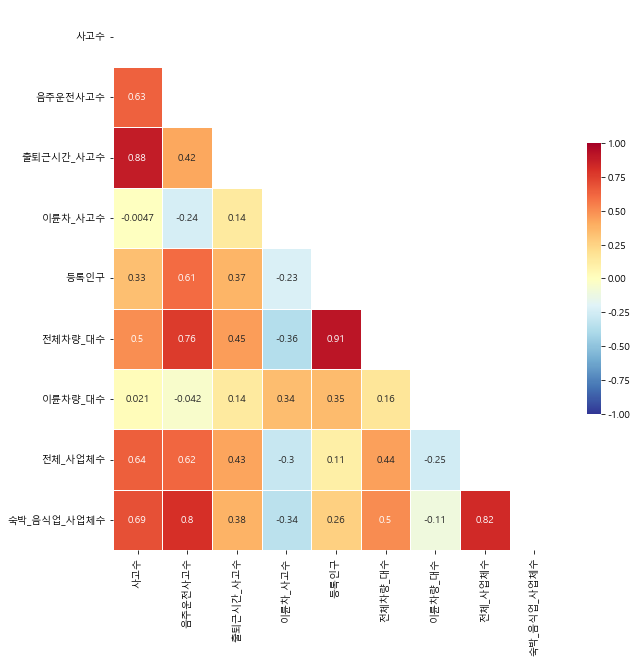

In [67]:
corr = df_3ytotal.corr()
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

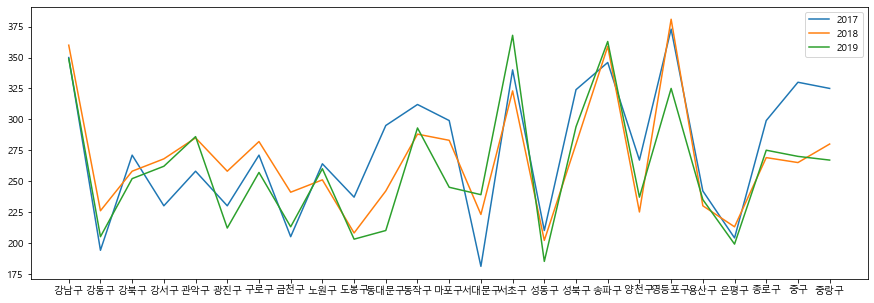

In [68]:
plt.figure(figsize=[15,5])

x = district_final['자치구'].unique()
y1 = district_final[district_final['년도']=='2017']['사고수']
y2 = district_final[district_final['년도']=='2018']['사고수']
y3 = district_final[district_final['년도']=='2019']['사고수']

plt.plot(x, y1, x, y2, x, y3)
plt.legend([2017,2018,2019])
plt.show()


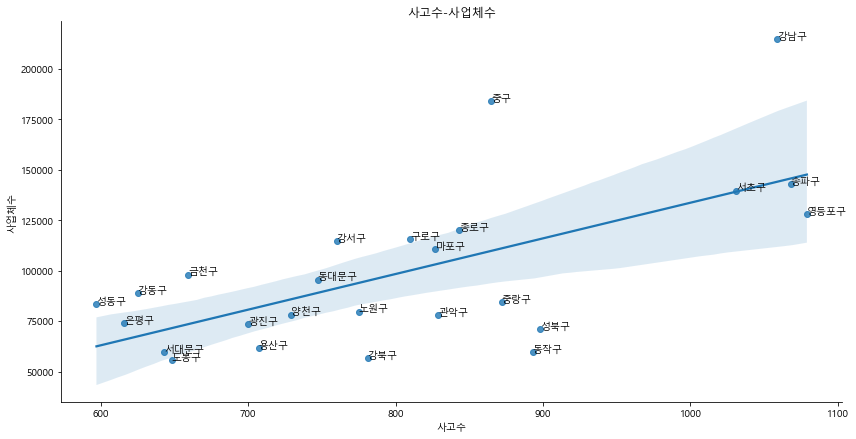

In [69]:
p1 = sns.lmplot(x ='사고수', # Horizontal axis
           y ='전체_사업체수', # Vertical axis
           data=df_3ytotal, # Data source
           fit_reg=True, # Don't fix a regression line
           height = 6,
           aspect =2)     # size and dimension

plt.title('사고수-사업체수')
# Set x-axis label
plt.xlabel('사고수')
# Set y-axis label
plt.ylabel('사업체수')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_3ytotal['사고수'], df_3ytotal['전체_사업체수'], df_3ytotal['자치구'], plt.gca())  

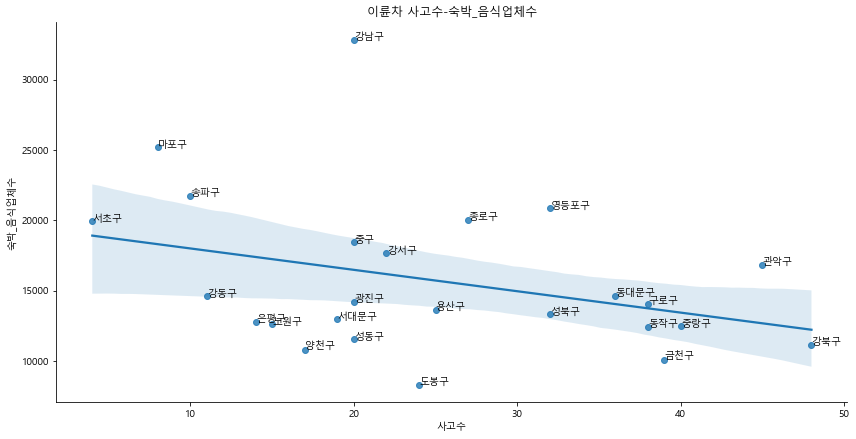

In [70]:
p1 = sns.lmplot(x ='이륜차_사고수', # Horizontal axis
           y ='숙박_음식업_사업체수', # Vertical axis
           data=df_3ytotal, # Data source
           fit_reg=True, # Don't fix a regression line
           height = 6,
           aspect =2)     # size and dimension

plt.title('이륜차 사고수-숙박_음식업체수')
# Set x-axis label
plt.xlabel('사고수')
# Set y-axis label
plt.ylabel('숙박_음식업체수')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_3ytotal['이륜차_사고수'], df_3ytotal['숙박_음식업_사업체수'], df_3ytotal['자치구'], plt.gca())  

In [8]:
# 지도 표시 layer(인구, 차량대수, 사업체수, 사고수)

In [56]:
import webbrowser
import folium, json
import pandas as pd

m = folium.Map(
    location=[37.566345, 126.977893], 
    tiles="OpenStreetMap", 
    zoom_start=10
)

#geo_data = json.load(open('./data/skorea_municipalities_geo_simple.json', encoding='utf-8'))

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

df = pd.read_csv('./data/district_final.csv', encoding='utf-8', dtype={'code':'str'})
df2 = df.groupby('자치구')[['사고수','음주운전사고수','출퇴근시간_사고수','이륜차_사고수','등록인구','전체차량_대수','이륜차량_대수','전체_사업체수','숙박_음식업_사업체수']].sum()
df2 = df2.reset_index()

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data = df2,
    columns=['자치구', '사고수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.8
).add_to(m)

m.save('folium_kr.html')

In [57]:
# district = pd.read_csv('./data/district_final.csv', encoding='utf-8')
# district

In [58]:
m

In [43]:
district = pd.read_csv('./data/district_final.csv', encoding='utf-8')
district

,Unnamed: 0,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
1,1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
2,2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
3,3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
4,4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,2019,용산구,235,0,56,255,12,49.8,14,47,10,41,245185,92666,16145,20254,135240,4594,18282
71,71,2019,은평구,199,1,73,191,26,52.5,16,49,5,38,484546,150700,20880,24681,93631,4331,12965
72,72,2019,종로구,275,2,91,278,51,50.3,16,66,12,53,161869,63321,13269,39679,260446,6709,26606
73,73,2019,중구,270,1,79,267,27,51.1,7,57,7,54,136488,66089,14353,60127,392568,6250,34751


In [52]:
district2 = district.groupby('자치구')[['사고수','음주운전사고수','출퇴근시간_사고수','이륜차_사고수','등록인구','전체차량_대수','이륜차량_대수','전체_사업체수','숙박_음식업_사업체수']].sum()
district2 = district2.reset_index()
district2

,자치구,사고수,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,숙박_음식업_사업체수
0,강남구,1059,134,198,20,1658714,759647,50581,214911,32841
1,강동구,625,48,150,11,1312669,461024,49469,88804,14598
2,강북구,781,37,188,48,968612,297143,65594,56860,11179
3,강서구,760,70,190,22,1810139,667391,55889,114538,17657
4,관악구,829,65,178,45,1558303,437142,73559,77984,16863
5,광진구,700,53,150,20,1110333,353551,55069,73668,14225
6,구로구,810,62,186,38,1319416,480626,47761,115714,14078
7,금천구,659,36,174,39,759332,295853,34782,98036,10103
8,노원구,775,65,185,15,1643538,505261,44854,79750,12612
9,도봉구,648,50,160,24,1023514,335333,44267,55873,8297


In [5]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=13)
seoul_map